# Image classification
In this jupyter notebook, we will learn several strategies to train a deep learning neural network for image classification task, including:
- Multi-class classification task with MNIST dataset
  - densly connected NN
  - convolutional NN
- Binary classification task with cats & dogs dataset
  - train a convolutional NN on a small dataset
  - apply data augmentation and retrain the convnet
  - leveraging a pretrained model

## The MNIST dataset

The [MNIST](https://en.wikipedia.org/wiki/MNIST_database) database (Modified National Institute of Standards and Technology database) is a large dataset of handwritten digits that is commonly used for machine learning experiments.

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

from matplotlib import pyplot as plt
from collections import Counter

### MNIST image classification with a densely connected network

**Loading the MNIST dataset in Keras**

In [29]:
from tensorflow.keras.datasets import mnist
(X_all_train, y_all_train), (X_test, y_test) = mnist.load_data()

In [30]:
X_all_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
Counter(y_all_train)

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

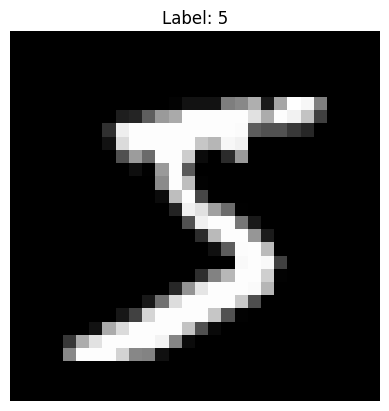

In [ ]:
# visualize an example image
plt.imshow(X_all_train[0], cmap='gray')
plt.title(f'Label: {y_all_train[0]}')
plt.axis('off')
plt.show()

In [ ]:
X_all_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

**Preprocess the image data**
- reshape and scale

In [31]:
X_all_train_p = X_all_train.reshape((60000, 28 * 28)).astype("float32") / 255
X_test_p = X_test.reshape((10000, 28 * 28)).astype("float32") / 255

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_all_train_p, y_all_train, test_size=0.2, random_state=42)


**A two-layer densely connected network architecture**

In [9]:
dense_model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Compile/config the model**

In [11]:
dense_model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**"Fitting" the model**

In [15]:
dense_history = dense_model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_val,y_val))
# 60000/128 = 469 batches

Epoch 1/5
375/375 [==============================] - 6s 15ms/step - loss: 0.2963 - accuracy: 0.9147 - val_loss: 0.1572 - val_accuracy: 0.9565
Epoch 2/5
375/375 [==============================] - 4s 11ms/step - loss: 0.1231 - accuracy: 0.9646 - val_loss: 0.1117 - val_accuracy: 0.9672
Epoch 3/5
375/375 [==============================] - 5s 13ms/step - loss: 0.0804 - accuracy: 0.9765 - val_loss: 0.0871 - val_accuracy: 0.9743
Epoch 4/5
375/375 [==============================] - 5s 14ms/step - loss: 0.0584 - accuracy: 0.9828 - val_loss: 0.0802 - val_accuracy: 0.9757
Epoch 5/5
375/375 [==============================] - 4s 11ms/step - loss: 0.0433 - accuracy: 0.9870 - val_loss: 0.0751 - val_accuracy: 0.9795


In [16]:
# display the model content
dense_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


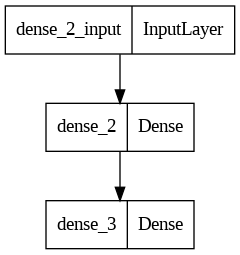

In [17]:
# visualize the model architecture
keras.utils.plot_model(dense_model, "binary_classifier.png") # show_shapes=True

**Evaluate model performance**

In [18]:
# evaluate model performance regarding accuracy
test_loss, test_acc = dense_model.evaluate(X_test_p, y_test)
print(f"test_acc: {np.round(test_acc,3)}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0671 - accuracy: 0.9801
test_acc: 0.98


In [19]:
# predict other evaluation metrics
predict_probs = dense_model.predict(X_test_p)
y_pred = [p.argmax() for p in predict_probs]
print(classification_report(y_test, y_pred))

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [20]:
predict_probs[:3].round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
y_pred[:3]

[7, 2, 1]

**Visualize model performance during training**
- loss
- accuracy

In [22]:
dense_history.history

{'loss': [0.2963215112686157,
  0.12306800484657288,
  0.08043470978736877,
  0.058437079191207886,
  0.04328552260994911],
 'accuracy': [0.9146666526794434,
  0.9646041393280029,
  0.9764583110809326,
  0.9827708601951599,
  0.9869791865348816],
 'val_loss': [0.1572047770023346,
  0.11169259995222092,
  0.08710049092769623,
  0.08017485588788986,
  0.07510620355606079],
 'val_accuracy': [0.9564999938011169,
  0.9672499895095825,
  0.9742500185966492,
  0.9756666421890259,
  0.9794999957084656]}

In [24]:
def visualize_performance(history, flag):
  history_dict = history.history
  epochs = range(1, len(history_dict["loss"]) + 1)

  plt.plot(epochs, history_dict[flag], "bo", label="Training "+flag)
  plt.plot(epochs, history_dict["val_"+flag], "b", label="Validation "+flag)
  plt.title("Training and validation "+flag)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

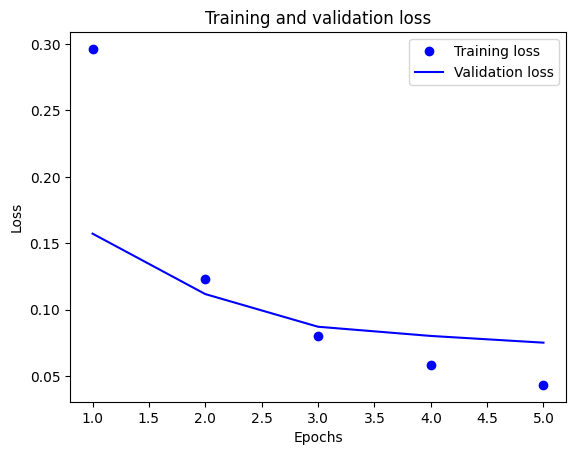

In [25]:
visualize_performance(dense_history,flag = 'loss')

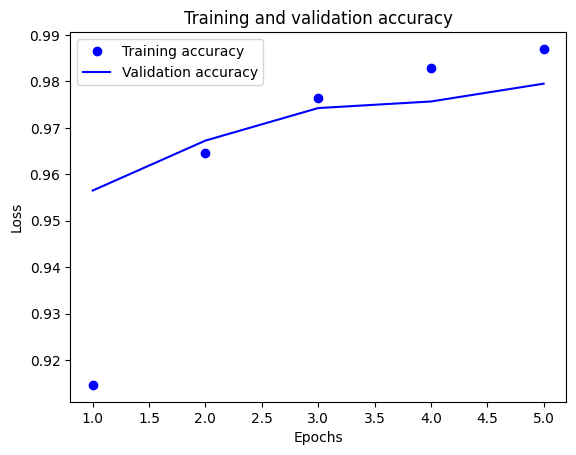

In [26]:
visualize_performance(dense_history, flag = 'accuracy')

### MNIST image classification with convolutional neural network

In [ ]:
# build a convnet using Keras functional API
inputs = keras.Input(shape=(28, 28, 1)) # height, width, channels
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
conv_model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

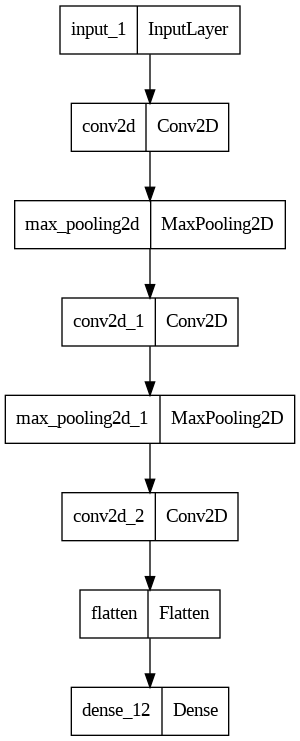

In [ ]:
keras.utils.plot_model(conv_model, "conv_classifier.png") # show_shapes=True

**Prepare MNIST images data for the convet**
- reshape and scale

In [ ]:
X_all_train_p = X_all_train.reshape((60000, 28, 28, 1)).astype("float32") / 255
X_test_p = X_test.reshape((10000, 28, 28, 1)).astype("float32") / 255

**Config the model**

In [ ]:
conv_model.compile(optimizer="rmsprop",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])
conv_history = conv_model.fit(X_all_train_p, y_all_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 17s 18ms/step - loss: 0.1386 - accuracy: 0.9591
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0287 - accuracy: 0.9911
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0200 - accuracy: 0.9937
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0116 - accuracy: 0.9965


**Evaluate model performance**

In [ ]:
# evaluate model performance regarding accuracy
test_loss, test_acc = conv_model.evaluate(X_test_p, y_test)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0258 - accuracy: 0.9922
Test accuracy: 0.992


In [ ]:
# print other evaluation metrics
predict_probs = conv_model.predict(X_test_p)
y_pred = [p.argmax() for p in predict_probs]
print(classification_report(y_test, y_pred))

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Visualize model performance during training**
- loss
- accuracy

In [ ]:
visualize_performance(conv_history,flag = 'loss')

In [ ]:
visualize_performance(conv_history,flag = 'accuracy')

## The cats and dogs [dataset](https://www.kaggle.com/c/dogs-vs-cats/overview)

Asirra in partnership with Petfinder.com ( the world's largest site devoted to finding homes for homeless pets), provided Microsoft Research with over three million images of cats and dogs, manually classified by people at thousands of animal shelters across the United States. We are going to use a subset of this data to train binary image classification models.


### Train a convnet from scratch on a small dataset
- naively train a small convnet, without regularization

In [27]:
# build a small convnet
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
conv2_model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
conv2_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [ ]:
# configure the model for training
conv2_model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [33]:
# set up a data pipeline to automatically read image files into tensors
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# please make sure to change the dir to your own path
mydata_dir = "/content/drive/MyDrive/DLP/dogs-vs-cats/cats_vs_dogs_small/"

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(mydata_dir+"train/",
                image_size=(180, 180),batch_size=32)
validation_dataset = image_dataset_from_directory(mydata_dir+"validation/",
                image_size=(180, 180),batch_size=32)
test_dataset = image_dataset_from_directory(mydata_dir+"test/",
                image_size=(180, 180),batch_size=32)

Mounted at /content/drive
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [34]:
# display the shapes of the data and labels yield by the Dataset
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
# fit the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
conv2_history = conv2_model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 155s 2s/step - loss: 0.7044 - accuracy: 0.5045 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 40s 631ms/step - loss: 0.7048 - accuracy: 0.5295 - val_loss: 0.6870 - val_accuracy: 0.5560
Epoch 3/30
63/63 [==============================] - 40s 625ms/step - loss: 0.6899 - accuracy: 0.5805 - val_loss: 0.6670 - val_accuracy: 0.5980
Epoch 4/30
63/63 [==============================] - 39s 606ms/step - loss: 0.6605 - accuracy: 0.6090 - val_loss: 0.6496 - val_accuracy: 0.6290
Epoch 5/30
63/63 [==============================] - 39s 604ms/step - loss: 0.6342 - accuracy: 0.6505 - val_loss: 0.6904 - val_accuracy: 0.5870
Epoch 6/30
63/63 [==============================] - 40s 623ms/step - loss: 0.6202 - accuracy: 0.6685 - val_loss: 0.6348 - val_accuracy: 0.6330
Epoch 7/30
63/63 [==============================] - 38s 601ms/step - loss: 0.5699 - accuracy: 0.7070 - val_loss: 0.5841 - val_accuracy: 0.6800
E

In [ ]:
# evaluate model performance on test set
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 120s 2s/step - loss: 0.5779 - accuracy: 0.7145
Test accuracy: 0.715


**Prepare test dataset for detailed evaluation with classification_report**

In [ ]:
feature_tensors = []
label_tensors = []
for features_batch, labels_batch in test_dataset:
  feature_tensors.append(features_batch)
  label_tensors.append(labels_batch)

y_test = keras.layers.concatenate(label_tensors)
X_test_tensor = keras.layers.concatenate(feature_tensors, axis=0)

In [ ]:
X_test_tensor.shape

TensorShape([2000, 180, 180, 3])

In [ ]:
# print other evaluation metrics
predict_probs = conv2_model.predict(X_test_tensor)
y_pred_labels = (predict_probs > 0.5).astype(int)

print(classification_report(y_test.numpy(),y_pred_labels))

63/63 [==============================] - 9s 140ms/step
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1000
           1       0.70      0.74      0.72      1000

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



**Visualize model performance during training**
- loss
- accuracy

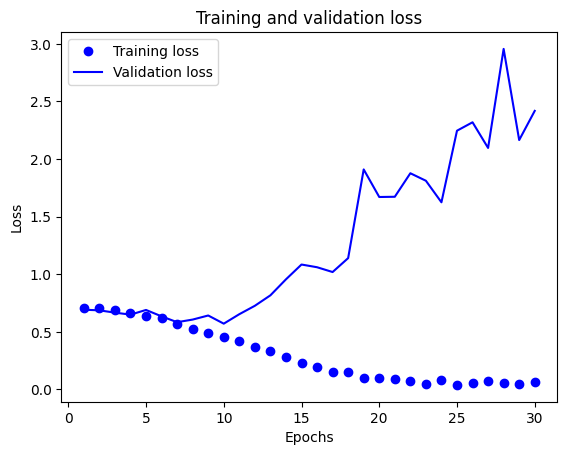

In [ ]:
visualize_performance(conv2_history, flag = 'loss')

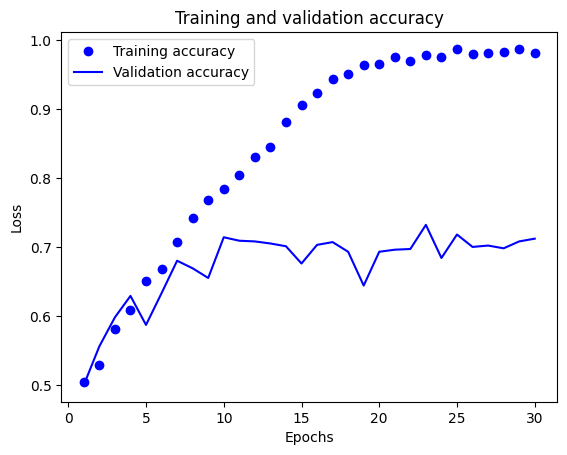

In [ ]:
visualize_performance(conv2_history, flag = 'accuracy')

### Data augmentation and retrain the convnet
- do data augmentation to mitigate overfitting


In [ ]:
# define a data augmentation stage to add to an image model
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

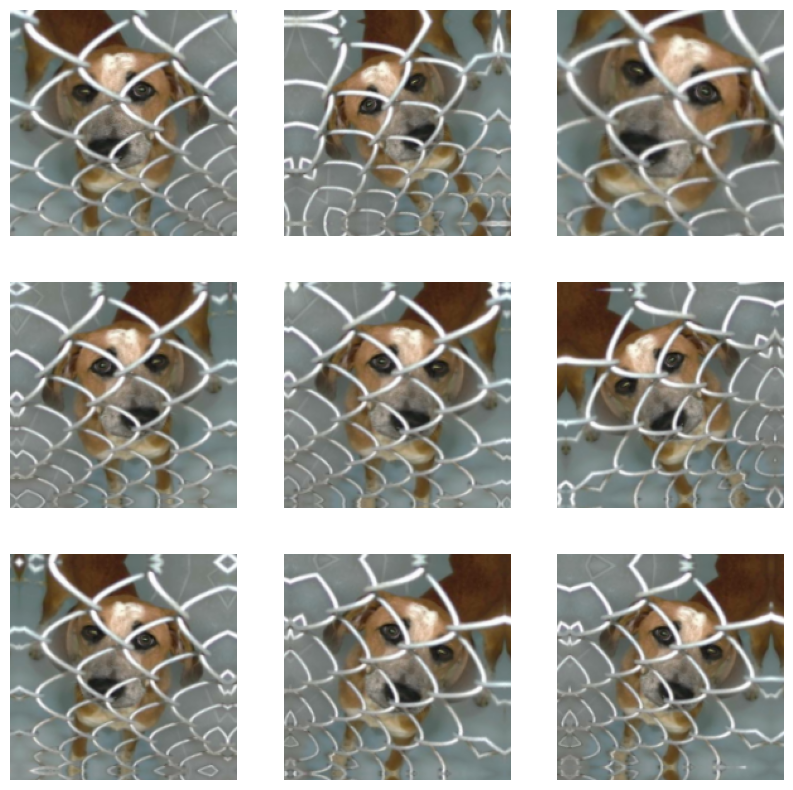

In [ ]:
# display some randomly augmented training images
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
# define a new convnet that includes data augmentation and dropout
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
aug_conv2_model = keras.Model(inputs=inputs, outputs=outputs)

aug_conv2_model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
# train the regularized convnet
# this process takes about 2 hours
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
aug_conv2_history = aug_conv2_model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 44s 664ms/step - loss: 0.6973 - accuracy: 0.5040 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 41s 635ms/step - loss: 0.6950 - accuracy: 0.5130 - val_loss: 0.6896 - val_accuracy: 0.5710
Epoch 3/100
63/63 [==============================] - 42s 662ms/step - loss: 0.6887 - accuracy: 0.5515 - val_loss: 0.6815 - val_accuracy: 0.5700
Epoch 4/100
63/63 [==============================] - 42s 651ms/step - loss: 0.6760 - accuracy: 0.5850 - val_loss: 0.6628 - val_accuracy: 0.6140
Epoch 5/100
63/63 [==============================] - 43s 674ms/step - loss: 0.6612 - accuracy: 0.6235 - val_loss: 0.6563 - val_accuracy: 0.6220
Epoch 6/100
63/63 [==============================] - 38s 599ms/step - loss: 0.6423 - accuracy: 0.6545 - val_loss: 0.6463 - val_accuracy: 0.6200
Epoch 7/100
63/63 [==============================] - 41s 643ms/step - loss: 0.6231 - accuracy: 0.6525 - val_loss: 0.6226 - val_accuracy:

**Visualize model performance during training**
- loss
- accuracy

In [ ]:
# evaluate model performance regarding accuracy
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 10s 149ms/step - loss: 0.4725 - accuracy: 0.7950
Test accuracy: 0.795


In [ ]:
# print other evaluation metrics
predict_probs = aug_conv2_model.predict(X_test_tensor)
y_pred_labels = (predict_probs > 0.5).astype(int)

print(classification_report(y_test.numpy(),y_pred_labels))

63/63 [==============================] - 8s 132ms/step
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.85      0.84      0.85      1000

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



**Visualize model performance during training**
- loss
- accuracy

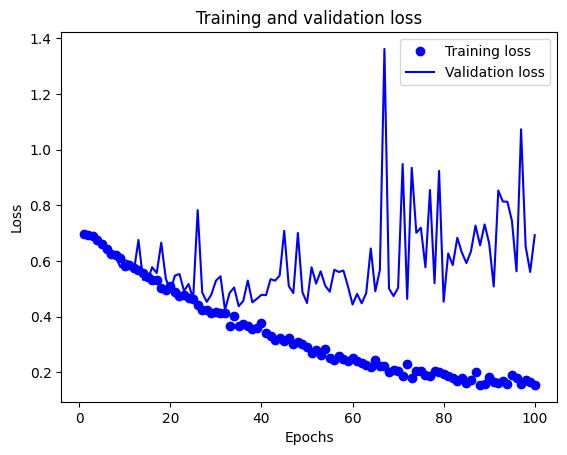

In [ ]:
visualize_performance(aug_conv2_history, flag = 'loss')

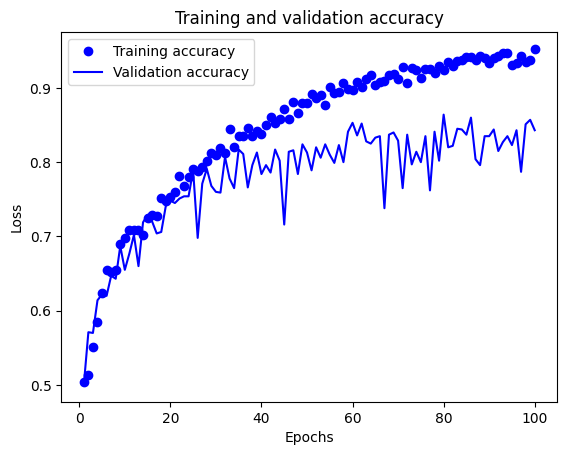

In [ ]:
visualize_performance(aug_conv2_history, flag = 'accuracy')

### Leveraging a pretrained model

#### Feature extraction with a pretrained model

In [35]:
# Instatiating the VGG16 convolutional base
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [36]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [37]:
# Extracting the VGG16 features and corresponding labels

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 7s 7s/step


In [38]:
train_features.shape

(2000, 5, 5, 512)

In [39]:
# Defining and training the densely connected classifier
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
vgg16_model = keras.Model(inputs, outputs)
vgg16_model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss")
]
vgg16_history = vgg16_model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 4s 57ms/step - loss: 28.2191 - accuracy: 0.9175 - val_loss: 4.0154 - val_accuracy: 0.9760
Epoch 2/20
63/63 [==============================] - 4s 60ms/step - loss: 2.8939 - accuracy: 0.9760 - val_loss: 18.4866 - val_accuracy: 0.9260
Epoch 3/20
63/63 [==============================] - 3s 45ms/step - loss: 3.1904 - accuracy: 0.9840 - val_loss: 7.5861 - val_accuracy: 0.9630
Epoch 4/20
63/63 [==============================] - 2s 39ms/step - loss: 1.1916 - accuracy: 0.9915 - val_loss: 4.7995 - val_accuracy: 0.9750
Epoch 5/20
63/63 [==============================] - 2s 37ms/step - loss: 0.8822 - accuracy: 0.9935 - val_loss: 7.3179 - val_accuracy: 0.9650
Epoch 6/20
63/63 [==============================] - 4s 63ms/step - loss: 0.9101 - accuracy: 0.9935 - val_loss: 5.3917 - val_accuracy: 0.9730
Epoch 7/20
63/63 [==============================] - 3s 47ms/step - loss: 0.2824 - accuracy: 0.9980 - val_loss: 5.4370 - val_accuracy: 0.9740
Epoch 8/20


In [45]:
# evaluate model performance regarding accuracy
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 15ms/step - loss: 4.1699 - accuracy: 0.9735
Test accuracy: 0.974


In [47]:
# print other evaluation metrics
predict_probs = vgg16_model.predict(test_features)
y_pred_labels = (predict_probs > 0.5).astype(int)

print(classification_report(test_labels,y_pred_labels))

63/63 [==============================] - 1s 19ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1000
           1       0.99      0.95      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



**Visualize model performance during training**
- loss
- accuracy

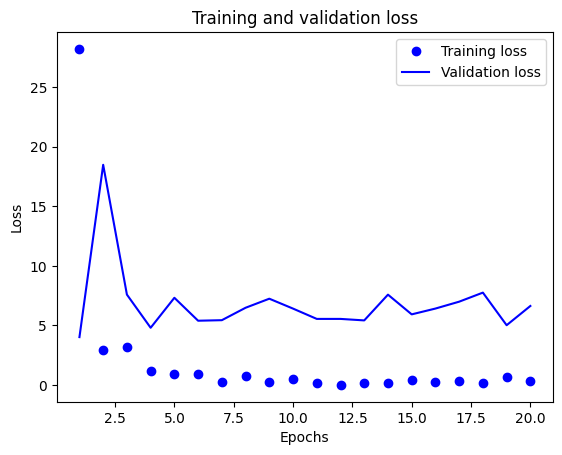

In [48]:
visualize_performance(vgg16_history, flag = 'loss')

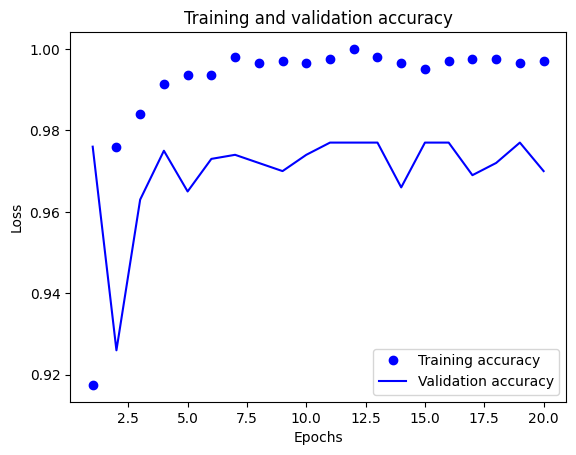

In [49]:
visualize_performance(vgg16_history, flag = 'accuracy')